In [1]:
import csv
import json
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import load_data

# Load all the data of authors and papers:

In [2]:
import os; os.chdir('/mnt/c/Users/maaik/Documents/thesis')


In [27]:
authors_file = "resources/evaluation/2020/corpus-subset-for-queries.authors.csv"
papers_file = "resources/evaluation/2020/corpus-subset-for-queries.papers.csv"
authors_papers_file = "resources/evaluation/2020/corpus-subset-for-queries.paper_authors.csv"
corpus_data_file = "resources/corpus/2020/corpus-subset-for-queries.jsonl"
training_data_file = 'resources/training/2020/TREC-Fair-Ranking-training-sample.json'
evaluation_data_file = 'resources/evaluation/2020/TREC-Fair-Ranking-eval-sample.json'

authors = load_data.load_authors(authors_file)
papers = load_data.load_papers(papers_file)
papers = load_data.load_papers_authors(authors_papers_file, papers)
papers = load_data.load_corpus(corpus_data_file, papers)
training_data = load_data.load_training_data(training_data_file)

In [4]:
import pandas as pd


In [26]:
t = pd.read_json(training_data_file,lines=True)
t = t.explode('documents')
t['doc_id'] = t.documents.apply(lambda row: row.get('doc_id'))
t.doc_id.drop_duplicates()

0      3e19046c665867bbe557685da60738a40738010a
0      7ef08f1fa127af817cdfd9d3bd00bdf60e32143b
0      ec13c3e7119191802e6f5783d297fe7a5a05293e
0      8fc928bb430d3f72ac876ca156042ad1860acacd
0      b2fdee22aa02477292b858fbafcb418932732bce
                         ...                   
199    98ab45160269f7c1545f7924f989d5da1895e9a5
199    37440fe96af3225859678b79328d5a78892a4470
199    305b8306b23f42870fa3191af85c547e4a922c44
199    00b213795dd4c926f3a4b4a2979a845f0ca6b7f5
199    0cadf8c2eeb3009d46855fb0470c1af0ad2017d2
Name: doc_id, Length: 4649, dtype: object

In [28]:
e = pd.read_json(evaluation_data_file, lines=True)
e = e.explode('documents')
e['doc_id'] = e.documents.apply(lambda row: row.get('doc_id'))
e.doc_id.drop_duplicates()

0      40d8bea494d4ff4c46f7ad5cb2dcdaa6f96ed5a4
0      008a2a2c765485af2e035a2572ba9fc1102eabff
0      4a1472c575488ed9acee6c5481f68b95a0c34092
0      ff8df0745136fb183ea72b783ff38f8a7ad5ceec
0      90605deb1da5e3d5548da12dc130fc0341a6a255
                         ...                   
199    78f9eefb29067e17792ffb5801cd872e3f0ec3e4
199    54c2cd88bdaf425a2befc6d7513d8eaf540bcfee
199    7fcdace7dcdf40fac377d88c116280ee1b416fcc
199    446a33cf83184ccd3f8eb29f22544bf25d6d769b
199    8c7ea227d4322b807f555295c61befdd5a211e9b
Name: doc_id, Length: 4693, dtype: object

In [32]:
len(set(t.doc_id.to_list() + e.doc_id.to_list()))

9014

In [19]:
pd.read_csv(papers_file)

,paper_sha,paper_title,paper_year,paper_venue,n_citations,n_key_citations
0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN
1,770e91f0ea16d4318ed7f4fc77081a5b4a51696f,The Flynn effect and memory function,2010.0,Journal of clinical and experimental neuropsyc...,23.0,NaN
2,c39a6b39cf5cfc1a117b6345e3713c3220b4b521,5G-Based Systems Design for Tactile Internet,2019.0,Proceedings of the IEEE,18.0,NaN
3,c21f829c68c506db704a483101361acd7a6fe68e,Global prevalence of dementia: a Delphi consen...,2006.0,NaN,1769.0,NaN
4,b1bc74255ce7094509524dac7f62db4dd91130f4,Feature Detection,2009.0,Encyclopedia of Biometrics,0.0,NaN
...,...,...,...,...,...,...
8874,349e5453f7e6721ec4f4e8522dc06b649763557f,Real-time markerless tracking for augmented re...,2006.0,IEEE Transactions on Visualization and Compute...,349.0,NaN
8875,fec7d1998f8a69a0e16e8a47c1d3a4c02022f054,An RFID Indoor Positioning Algorithm Based on ...,2018.0,Sensors,14.0,NaN
8876,4ff0bb48f0618cc5de95598f8f045e1a53f23268,Second Language Writing,2003.0,NaN,763.0,NaN
8877,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN


In [12]:
training_data

[{'qid': 5438,
  'query': 'cloud computing',
  'frequency': 5.70942816904982e-05,
  'documents': [{'doc_id': '3e19046c665867bbe557685da60738a40738010a',
    'relevance': 0},
   {'doc_id': '7ef08f1fa127af817cdfd9d3bd00bdf60e32143b', 'relevance': 0},
   {'doc_id': 'ec13c3e7119191802e6f5783d297fe7a5a05293e', 'relevance': 0},
   {'doc_id': '8fc928bb430d3f72ac876ca156042ad1860acacd', 'relevance': 0},
   {'doc_id': 'b2fdee22aa02477292b858fbafcb418932732bce', 'relevance': 1},
   {'doc_id': '8466964cf0884351c3e1b8444b5d71e64eb69dd6', 'relevance': 0},
   {'doc_id': '5dec44c59ddf5b18b242fce52c00cf47c40e6e2e', 'relevance': 0},
   {'doc_id': '1f1946887c8be228864ee23374bc0b427abf0884', 'relevance': 0},
   {'doc_id': '1f7190fc294246f83f1f331cc51e3264851d0d36', 'relevance': 0},
   {'doc_id': '33e77edcd42960bc1ed931ada45b9aa8d0e60e16', 'relevance': 0},
   {'doc_id': '325f4787a40c14518529a64332b801e6f53b22d7', 'relevance': 0},
   {'doc_id': '4f6577ead70ef97d620dec986cf054ae4a05035d', 'relevance': 0},
 

In [11]:
pd.DataFrame(authors.values())

,corpus_author_id,name,num_citations,num_papers,i10,h_index,h_class
0,50240353,Badder Marzocchi,4653,522,102,30,H
1,26971991,Patrick Fontana,133,72,4,7,L
2,5527266,Firdevs Örnek,67,66,1,5,L
3,144886693,Prashant Kumar Singh,3773,45,14,14,H
4,40552524,Jacqueline Day,186,6,3,5,L
...,...,...,...,...,...,...,...
31970,27049863,Andrew Thomas Potter,993,129,23,17,H
31971,73485240,Danyyl Brzhechko,429,191,12,12,H
31972,1491583556,Nannan Shi,97,5,2,2,L
31973,123269867,Francis Veillon,74,15,1,2,L


In [10]:
pd.DataFrame(papers.values())

,paper_sha,paper_title,paper_year,paper_venue,n_citations,n_key_citations,authors_order,entities,magId,journalVolume,...,authors,journalName,paperAbstract,inCitations,pdfUrls,title,doi,sources,doiUrl,venue
0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,,"[(5453559, 1), (143661011, 2), (6842569, 3), (...",[],2558641003,16,...,"[{'name': 'Mohammad Raish', 'ids': ['5453559']...",BMC Complementary and Alternative Medicine,BackgroundFulminant hepatic failure (FHF) is c...,"[4d43cadb16faa81242a376119098b3ee03b2ed29, bf1...",[https://bmccomplementalternmed.biomedcentral....,Hepatoprotective activity of Lepidium sativum ...,10.1186/s12906-016-1483-4,[Medline],https://doi.org/10.1186/s12906-016-1483-4,BMC Complementary and Alternative Medicine
1,770e91f0ea16d4318ed7f4fc77081a5b4a51696f,The Flynn effect and memory function,2010.0,Journal of clinical and experimental neuropsyc...,23.0,,"[(5150690, 1)]",[],1966427980,32,...,"[{'name': 'Sallie Baxendale', 'ids': ['5150690...",Journal of Clinical and Experimental Neuropsyc...,The Flynn effect refers to the steady increase...,"[c0fff35a62b68ce8c4cacc42a87ec99312540599, f0d...",[http://www.iapsych.com/iqmr/fe/LinkedDocument...,The Flynn effect and memory function,10.1080/13803390903493515,[Medline],https://doi.org/10.1080/13803390903493515,Journal of clinical and experimental neuropsyc...
2,c39a6b39cf5cfc1a117b6345e3713c3220b4b521,5G-Based Systems Design for Tactile Internet,2019.0,Proceedings of the IEEE,18.0,,"[(48161718, 1), (2868039, 2), (143969823, 3), ...",[],2889502752,107,...,"[{'name': 'Chong Li', 'ids': ['48161718']}, {'...",Proceedings of the IEEE,Tactile internet is defined as a network that ...,"[3f86d6db45cf25235cad601a69e2983ef094c14b, 1d3...",[https://doi.org/10.1109/JPROC.2018.2864984],5G-Based Systems Design for Tactile Internet,10.1109/JPROC.2018.2864984,[DBLP],https://doi.org/10.1109/JPROC.2018.2864984,Proceedings of the IEEE
3,c21f829c68c506db704a483101361acd7a6fe68e,Global prevalence of dementia: a Delphi consen...,2006.0,,1769.0,,"[(1393846726, 1)]",[],,31,...,"[{'name': ' ', 'ids': ['1393846726']}]",Tijdschrift voor VerpleeghuisGeneeskunde,SamenvattingVolgens rapport van de Wereld Gezo...,"[e1ef62b1d9f790a7e605443aa8df8310d8f8900e, 584...",[],Global prevalence of dementia: a Delphi consen...,10.1007/BF03075138,[],https://doi.org/10.1007/BF03075138,
4,b1bc74255ce7094509524dac7f62db4dd91130f4,Feature Detection,2009.0,Encyclopedia of Biometrics,0.0,,"[(3205302, 1)]",[],,,...,"[{'name': 'Florian Stimberg', 'ids': ['3205302...",,,[],[https://doi.org/10.1007/978-0-387-73003-5_106...,Feature Detection,10.1007/978-0-387-73003-5_1067,[DBLP],https://doi.org/10.1007/978-0-387-73003-5_1067,Encyclopedia of Biometrics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874,349e5453f7e6721ec4f4e8522dc06b649763557f,Real-time markerless tracking for augmented re...,2006.0,IEEE Transactions on Visualization and Compute...,349.0,,"[(1800487, 1), (1695599, 2), (2940202, 3), (17...",[],2108598000,12,...,"[{'name': 'Andrew I. Comport', 'ids': ['180048...",IEEE Transactions on Visualization and Compute...,Tracking is a very important research subject ...,"[dbd9b626bf800b8e08bc4fbfc8caf674eaf7a786, a35...","[https://www.wikidata.org/entity/Q48931550, ht...",Real-time markerless tracking for augmented re...,10.1109/TVCG.2006.78,"[Medline, DBLP]",https://doi.org/10.1109/TVCG.2006.78,IEEE Transactions on Visualization and Compute...
8875,fec7d1998f8a69a0e16e8a47c1d3a4c02022f054,An RFID Indoor Positioning Algorithm Based on ...,2018.0,Sensors,14.0,,"[(1811817, 1), (35569704, 2), (48982119, 3), (...",[],2802740170,18,...,"[{'name': 'He Xu', 'ids': ['1811817']}, {'name...","Sensors (Basel, Switzerland)","Nowadays, location-based services, which inclu...","[951bf7b303268b7e26c60313f2c18a6eb843c6ee, f3a...",[https://res.mdpi.com/d_attachment/sensors/sen...,An RFID 

In [6]:
pd.read_csv(authors_file)

,corpus_author_id,name,num_citations,num_papers,i10,h_index,h_class
0,50240353,Badder Marzocchi,4653,522,102,30,H
1,26971991,Patrick Fontana,133,72,4,7,L
2,5527266,Firdevs Örnek,67,66,1,5,L
3,144886693,Prashant Kumar Singh,3773,45,14,14,H
4,40552524,Jacqueline Day,186,6,3,5,L
...,...,...,...,...,...,...,...
31970,27049863,Andrew Thomas Potter,993,129,23,17,H
31971,73485240,Danyyl Brzhechko,429,191,12,12,H
31972,1491583556,Nannan Shi,97,5,2,2,L
31973,123269867,Francis Veillon,74,15,1,2,L


In [12]:
from collections import Counter

In [16]:
def extract_metadata(df):
    df['min_hindex'] = df.h_index.min()
    df['avg_hindex'] = df.h_index.mean()
    df['max_hindex'] = df.h_index.max()
    df['min_authorpapers'] = df.num_papers.min()
    df['avg_authorpapers'] = df.num_papers.mean()
    df['max_authorpapers'] = df.num_papers.max()
    df['min_i10index'] = df.i10.min()
    df['avg_i10index'] = df.i10.mean()
    df['max_i10index'] = df.i10.max()
    df['min_numcitations'] = df.num_citations.min()
    df['avg_numcitations'] = df.num_citations.mean()
    df['max_numcitations'] = df.num_citations.max()

    hclasses = Counter(df.h_class.to_list())
    df['num_hclass_L'] = hclasses['L']
    df['num_hclass_H'] = hclasses['H']

    return df[['paper_sha','min_hindex','avg_hindex','min_authorpapers', 'avg_authorpapers', 'max_authorpapers','min_i10index','avg_i10index','max_i10index','min_numcitations','avg_numcitations','max_numcitations','num_hclass_L','num_hclass_H']]

In [17]:
from tqdm import tqdm
tqdm.pandas()

In [64]:
meta = m.groupby('paper_sha').progress_apply(extract_metadata)
meta


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8879/8879 [00:53<00:00, 166.34it/s]


,paper_sha,min_hindex,avg_hindex,min_authorpapers,avg_authorpapers,max_authorpapers,min_i10index,avg_i10index,max_i10index,min_numcitations,avg_numcitations,max_numcitations,num_hclass_L,num_hclass_H
0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,5.0,12.75,16.0,78.75,188.0,2.0,19.50,65.0,53.0,572.625,2166.0,2,6
1,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,5.0,12.75,16.0,78.75,188.0,2.0,19.50,65.0,53.0,572.625,2166.0,2,6
2,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,5.0,12.75,16.0,78.75,188.0,2.0,19.50,65.0,53.0,572.625,2166.0,2,6
3,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,5.0,12.75,16.0,78.75,188.0,2.0,19.50,65.0,53.0,572.625,2166.0,2,6
4,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,5.0,12.75,16.0,78.75,188.0,2.0,19.50,65.0,53.0,572.625,2166.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.50,43.0,521.00,1501.0,20.0,249.25,691.0,2836.0,22988.500,62152.0,0,4
35807,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.50,43.0,521.00,1501.0,20.0,249.25,691.0,2836.0,22988.500,62152.0,0,4
35808,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.50,43.0,521.00,1501.0,20.0,249.25,691.0,2836.0,22988.500,62152.0,0,4
35809,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.50,43.0,521.00,1501.0,20.0,249.25,691.0,2836.0,22988.500,62152.0,0,4


In [63]:
p = pd.read_csv(papers_file)
ap = pd.read_csv(authors_papers_file, dtype={'corpus_author_id':str})
a = pd.read_csv(authors_file, dtype={'corpus_author_id':str})
m = pd.merge(p,pd.merge(ap,a,how='left'),how='left')
m

,paper_sha,paper_title,paper_year,paper_venue,n_citations,n_key_citations,corpus_author_id,position,name,num_citations,num_papers,i10,h_index,h_class
0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,5453559,1.0,Mohammad Raish,436.0,84.0,15.0,12.0,H
1,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,143661011,2.0,Ajaz Ahmad,423.0,78.0,18.0,12.0,H
2,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,6842569,3.0,Khalid M. Alkharfy,2166.0,188.0,65.0,26.0,H
3,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,5108409,4.0,Syed Rizwan Ahamad,53.0,16.0,2.0,5.0,L
4,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,4850426,5.0,Kazi Mohsin,147.0,29.0,5.0,7.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,144187895,1.0,Zhihong Zeng,2836.0,43.0,20.0,19.0,H
35807,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,145387780,2.0,Maja Pantic,20524.0,386.0,207.0,67.0,H
35808,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,2663984,3.0,Glenn I. Roisman,6442.0,154.0,79.0,35.0,H
35809,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,1739208,4.0,Thomas S. Huang,62152.0,1501.0,691.0,113.0,H


In [78]:
meta[(meta==0).any(axis=1)]

,paper_sha,min_hindex,avg_hindex,min_authorpapers,avg_authorpapers,max_authorpapers,min_i10index,avg_i10index,max_i10index,min_numcitations,avg_numcitations,max_numcitations,num_hclass_L,num_hclass_H
8,770e91f0ea16d4318ed7f4fc77081a5b4a51696f,23.0,23.000000,104.0,104.000000,104.0,44.0,44.000000,44.0,1598.0,1598.0,1598.0,0,1
19,c21f829c68c506db704a483101361acd7a6fe68e,8.0,8.000000,10011.0,10011.000000,10011.0,6.0,6.000000,6.0,2052.0,2052.0,2052.0,1,0
20,b1bc74255ce7094509524dac7f62db4dd91130f4,5.0,5.000000,9.0,9.000000,9.0,4.0,4.000000,4.0,450.0,450.0,450.0,1,0
25,84a83627f268f9d432a5c676532570f510ba121e,1.0,6.583333,1.0,24.583333,55.0,0.0,5.416667,12.0,3.0,222.0,533.0,9,3
26,84a83627f268f9d432a5c676532570f510ba121e,1.0,6.583333,1.0,24.583333,55.0,0.0,5.416667,12.0,3.0,222.0,533.0,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.500000,43.0,521.000000,1501.0,20.0,249.250000,691.0,2836.0,22988.5,62152.0,0,4
35807,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.500000,43.0,521.000000,1501.0,20.0,249.250000,691.0,2836.0,22988.5,62152.0,0,4
35808,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.500000,43.0,521.000000,1501.0,20.0,249.250000,691.0,2836.0,22988.5,62152.0,0,4
35809,bac67498d4061c7491baef675399caa87f6b7c01,19.0,58.500000,43.0,521.000000,1501.0,20.0,249.250000,691.0,2836.0,22988.5,62152.0,0,4


In [69]:
meta[meta.paper_sha == 'aee8a6d55b68e137d80790159c2253639ecb7d25']

,paper_sha,min_hindex,avg_hindex,min_authorpapers,avg_authorpapers,max_authorpapers,min_i10index,avg_i10index,max_i10index,min_numcitations,avg_numcitations,max_numcitations,num_hclass_L,num_hclass_H
224,aee8a6d55b68e137d80790159c2253639ecb7d25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [57]:
ap[ap.corpus_author_id.isna()]

,paper_sha,corpus_author_id,position
347,6c1550947e95b83be1b7014b56115e4b74a27762,NaN,27
380,153550ab4a88092f8eac151479e36e053e9e37e9,NaN,2
531,201b03aa6440d2874a44025cef6a481f82f8eb46,NaN,3
886,343cb84b40b89a5309c701d40c66515b0308623a,NaN,4
1581,da858ad07ee7cfe536db2df795d99607b1a5e20f,NaN,1
...,...,...,...
35270,59692a96b6d78c862477983f96d4af6ad97b93d2,NaN,2
35373,29aefc89802e5d684873d6ea004c52496c05ee91,NaN,1
35374,29aefc89802e5d684873d6ea004c52496c05ee91,NaN,2
35375,29aefc89802e5d684873d6ea004c52496c05ee91,NaN,3


In [58]:
a[a.corpus_author_id.isna()]

,corpus_author_id,name,num_citations,num_papers,i10,h_index,h_class


In [62]:
pd.merge(p,pd.merge(ap,a,how='left'),how='left')

,paper_sha,paper_title,paper_year,paper_venue,n_citations,n_key_citations,corpus_author_id,position,name,num_citations,num_papers,i10,h_index,h_class
0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,5453559,1.0,Mohammad Raish,436.0,84.0,15.0,12.0,H
1,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,143661011,2.0,Ajaz Ahmad,423.0,78.0,18.0,12.0,H
2,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,6842569,3.0,Khalid M. Alkharfy,2166.0,188.0,65.0,26.0,H
3,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,5108409,4.0,Syed Rizwan Ahamad,53.0,16.0,2.0,5.0,L
4,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,Hepatoprotective activity of Lepidium sativum ...,2016.0,BMC Complementary and Alternative Medicine,16.0,NaN,4850426,5.0,Kazi Mohsin,147.0,29.0,5.0,7.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,144187895,1.0,Zhihong Zeng,2836.0,43.0,20.0,19.0,H
35807,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,145387780,2.0,Maja Pantic,20524.0,386.0,207.0,67.0,H
35808,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,2663984,3.0,Glenn I. Roisman,6442.0,154.0,79.0,35.0,H
35809,bac67498d4061c7491baef675399caa87f6b7c01,"A Survey of Affect Recognition Methods: Audio,...",2009.0,IEEE Trans. Pattern Anal. Mach. Intell.,1389.0,NaN,1739208,4.0,Thomas S. Huang,62152.0,1501.0,691.0,113.0,H


In [54]:
set(ap.corpus_author_id.to_list()) - set(a.corpus_author_id.to_list())

{nan}

In [59]:
set(p.paper_sha.to_list()) - set(ap.paper_sha.to_list())

{'01babc78d35c4277eb6ae2970b44ed139d418850',
 '03a10e26c7177c949d3fac0b3ff101f5b9e7b77e',
 '11d945d4cfad930d27d6e124e43e18a82d4c8842',
 '1a0114319e8d60f18bf570e967126287dc6cc79a',
 '260e6acff14328b55c5fedbb875eaf3b38565ee2',
 '4313bf44960b5b726028b55e76f1c9f99334e347',
 '4463728346a0b1f5438a7bf4a473348de4b540dc',
 '4845b32d9c4153ed299246282d2a06a3d324109c',
 '4f9b7fe029938305bfe5fd6c5fb66f4a01d83937',
 '5602b782ca138e7d1c402cbbe519df6e1fc14d74',
 '5801cf4ca157a72d45eb31d2bcca58cb849ce906',
 '5879a3199efa00a3168fd0d9b247f0922296c48c',
 '6afc97668839a439e6858691ada76c9ddf798c2a',
 '6cb893c4592d056ab315a9b618e0bda159ba9f8a',
 '74bdf73f81b4ceecc9cf216558528e3c7a32cc05',
 '7ec963ee2a798db994d2b37d2b164b9ee1b01fbc',
 '895a9a55b37790938838d62ba24a3d1d9344af8b',
 '8d798e36a0b69ddfd62948c0758fd55c673eb2ca',
 'aee8a6d55b68e137d80790159c2253639ecb7d25',
 'b8f10c0d5e5c529ba0d8d32856ecb245e71faeac',
 'c0863b393ad68f2a136303ea3e313434a8daa79a',
 'dd3644c001f95fb4c8272400ee0699ce9eb02514',
 'de2ee064

In [55]:
set(ap.corpus_author_id.to_list())

{nan,
 '1390720821',
 '1693288',
 '39780507',
 '145870639',
 '26363347',
 '6881196',
 '46730084',
 '144648724',
 '28762210',
 '152566885',
 '7329815',
 '1500681374',
 '16309291',
 '46381471',
 '46370763',
 '5111379',
 '4235554',
 '16744523',
 '47876208',
 '46629775',
 '71479445',
 '1714666',
 '152538422',
 '1404539616',
 '32087694',
 '152113324',
 '3350774',
 '1732239',
 '117064133',
 '122024731',
 '103390825',
 '3253724',
 '1853946',
 '144622937',
 '3100527',
 '48578729',
 '152233784',
 '104611812',
 '144173472',
 '5957531',
 '144360572',
 '49662908',
 '144097618',
 '82502316',
 '119512651',
 '1680583',
 '37187331',
 '16691034',
 '1390531500',
 '145260557',
 '35414338',
 '38787464',
 '78381959',
 '38244462',
 '145035381',
 '96246226',
 '2659019',
 '5605268',
 '83467805',
 '102726993',
 '79169337',
 '49341776',
 '4424998',
 '144261392',
 '4285862',
 '2497134',
 '115450749',
 '49847481',
 '47241116',
 '1388550981',
 '1637350917',
 '47325480',
 '3205436',
 '88364753',
 '52132945',
 '1076

# Create graph with citations

In [6]:
G_papers = nx.Graph()
G_authors = nx.Graph()
for key in papers.keys():
    for key2 in papers[key]['outCitations']:
        G_papers.add_edge(key, key2) 
    for key2 in papers[key]['inCitations']:
        G_papers.add_edge(key2, key) 
    if 'authors_order' not in papers[key]:
        papers[key]['authors_avg_citations'] = papers[key]['n_citations']
    else:
        for author1 in papers[key]['authors_order']:
            for author2 in papers[key]['authors_order']:
                if author1[0] != author2[0] and author2[0] != '' and author1[0] != '':
                    G_authors.add_edge(author1[0], author2[0]) 
        #print (papers[key]['authors_order'])
        papers[key]['authors_avg_citations'] = np.mean([int(authors[a[0]]['num_citations']) for a in papers[key]['authors_order'] if (a[0] in authors)])
        papers[key]['authors_avg_h_index'] = np.mean([int(authors[a[0]]['h_index']) for a in papers[key]['authors_order'] if (a[0] in authors)])

/home/pilmus/thesis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pilmus/thesis/venv/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Some Stats

In [7]:
print ("Number of authors:", len(authors))
print ("Max papers:", max([int(a['num_papers']) for a in authors.values()]))
print ("Max citations:", max([int(a['num_citations']) for a in authors.values()]))

Number of authors: 31975
Max papers: 10011
Max citations: 223684


In [31]:
authors

{'50240353': {'corpus_author_id': '50240353',
  'name': 'Badder Marzocchi',
  'num_citations': '4653',
  'num_papers': '522',
  'i10': '102',
  'h_index': '30',
  'h_class': 'H'},
 '26971991': {'corpus_author_id': '26971991',
  'name': 'Patrick Fontana',
  'num_citations': '133',
  'num_papers': '72',
  'i10': '4',
  'h_index': '7',
  'h_class': 'L'},
 '5527266': {'corpus_author_id': '5527266',
  'name': 'Firdevs Örnek',
  'num_citations': '67',
  'num_papers': '66',
  'i10': '1',
  'h_index': '5',
  'h_class': 'L'},
 '144886693': {'corpus_author_id': '144886693',
  'name': 'Prashant Kumar Singh',
  'num_citations': '3773',
  'num_papers': '45',
  'i10': '14',
  'h_index': '14',
  'h_class': 'H'},
 '40552524': {'corpus_author_id': '40552524',
  'name': 'Jacqueline Day',
  'num_citations': '186',
  'num_papers': '6',
  'i10': '3',
  'h_index': '5',
  'h_class': 'L'},
 '32761043': {'corpus_author_id': '32761043',
  'name': 'Richard E. Petty',
  'num_citations': '32092',
  'num_papers': '

In [34]:
[aid for aid,author in authors.items() if author['num_papers'] =='10011']

['1393846726']

In [35]:
authors['1393846726']

{'corpus_author_id': '1393846726',
 'name': '\xa0 \xa0 \xa0',
 'num_citations': '2052',
 'num_papers': '10011',
 'i10': '6',
 'h_index': '8',
 'h_class': 'L'}

In [8]:
print ("Number of papers:", len(papers))
print ("Min Year:", min([float(p['paper_year']) for p in papers.values() if p['paper_year'] != '']))
print ("Common venues:", Counter([p['venue'] for p in papers.values()]).most_common(10))

Number of papers: 8879
Min Year: 1824.0
Common venues: [('', 4601), ('ArXiv', 96), ('Nature', 59), ('The Lancet', 59), ('The New England journal of medicine', 53), ('Science', 44), ('medRxiv', 37), ('Proceedings of the National Academy of Sciences of the United States of America', 34), ('JAMA', 27), ('Sensors', 23)]


In [9]:
print ("Number of queries:", len(training_data))
print ("Common queries:", Counter([p['query'] for p in training_data]).most_common(10))

Number of queries: 200
Common queries: [('cloud computing', 1), ('constitutional law', 1), ('metalinguistic knowledge', 1), ('drogenzubereitung', 1), ('usefulness of debit card', 1), ('facilities management', 1), ('cloud computing in education', 1), ('consumer buying behaviour in branded and unbranded clothing', 1), ('python', 1), ('participatory culture', 1)]


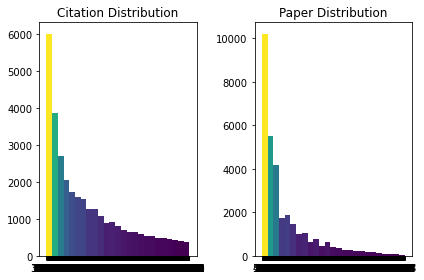

In [12]:
%matplotlib inline
from matplotlib import colors
import random

fig, axs = plt.subplots(1, 2, tight_layout=True)
n_bins = 25

#authors = dict(random.sample(authors.items(), 5000)) # Random Sampling
# fracs = N / N.max()
# norm = colors.Normalize(fracs.min(), fracs.max())

N, bins, patches = axs[0].hist([authors[x]["num_citations"] for x in authors] , bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

N, bins, patches = axs[1].hist([authors[x]["num_papers"] for x in authors] , bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

axs[0].title.set_text('Citation Distribution')
axs[1].title.set_text('Paper Distribution')

plt.show()


# Calculate the communities from the graph

In [14]:
import community as community_louvain
partion_papers = community_louvain.best_partition(G_papers)
partion_authors = community_louvain.best_partition(G_authors)

In [25]:
G_papers.number_of_nodes()



2623334

In [26]:
G_authors.number_of_nodes()

29733

In [15]:
query_id = 0
print ("comunities of authors for the query:", training_data[query_id]['query'])
for d in training_data[query_id]['documents']:
    if d['doc_id'] in papers:
        curr_partition = set()
        for author in papers[d['doc_id']]['authors_order']:
            if author[0] in partion_authors:
                curr_partition.add(partion_authors[author[0]])
        print (list(curr_partition), d['relevance'])

comunities of authors for the query: cloud computing
[4211] 0
[1917] 0
[3430] 0
[1007] 0
[4129] 1
[1007] 0
[] 0
[3812] 0
[381] 0
[2393] 0
[1007] 0
[3971] 0
[2600] 0
[] 1
[4716] 0
[267] 0
[1520] 0
[2107] 0
[1007] 0
[1007] 0
[3647] 0
[85] 0
[3354] 0
[] 0
[3565] 0
[2029] 0
[1520] 0
[428] 0
[1382] 1
[2600] 0


In [20]:
query_id = 1
print ("comunities of papers for the query:", training_data[query_id]['query'])
for d in training_data[query_id]['documents']:
    if d['doc_id'] in partion_papers:
        print (partion_papers[d['doc_id']], d['relevance'])

comunities of papers for the query: constitutional law
51 0
66 0
47 0
11 0
9 0
50 0
123 1
47 0
74 0
51 0
123 0
51 0
59 0
52 0
56 1
52 0
123 0
11 0
32 0
47 0
12 1
52 0
123 1
123 0
47 0
123 0
51 0
567 0
47 1
123 0


TODO: look the relevant items in the queries and compute co-occurence of the communities. Then, use this information to rerank the results.